This dataset contains the biodata of Korean idols and their Instagram followers count per May 2023. Since Kpop is a huge trend in the recent period, I'm going to visualize some graph related to it.

Note: I will be writing most of the analysis in the Medium report

In [5]:
import pandas as pd
data = pd.read_csv('dataset.csv')
print(data.columns)

Index(['Stage.Name', 'Group', 'ig_name', 'Followers', 'Gender.x', 'Full.Name',
       'Korean.Name', 'K.Stage.Name', 'Date.of.Birth', 'Debut', 'Company',
       'Country', 'Second.Country', 'Height', 'Weight', 'Birthplace',
       'Other.Group', 'Former.Group', 'Gender.y', 'age', 'year.career'],
      dtype='object')


First up, I'm going to visualize the count of idols per country.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Since there are two seperate data for the countries, namely Country and Second.Country, I'm gonna first find out the value of both and combine them into 1 to be able to visualize both into 1 chart.

In [17]:
counts_per_country = data['Country'].value_counts()
print("Counts of idols per country:")
print(counts_per_country)

Counts of idols per country:
South Korea    364
Japan           14
China           10
USA              6
Thailand         5
Taiwan           4
Hong Kong        2
Canada           1
Name: Country, dtype: int64


In [18]:
counts_per_country = data['Second.Country'].value_counts()
print("Counts of idols per country:")
print(counts_per_country)

Counts of idols per country:
USA              8
South Korea      3
Taiwan           2
Argentina|USA    1
Canada           1
Name: Second.Country, dtype: int64


In [19]:
country_counts = {
    'South Korea': 364,
    'Japan': 14,
    'China': 10,
    'USA': 6,
    'Thailand': 5,
    'Taiwan': 4,
    'Hong Kong': 2,
    'Canada': 1
}

second_country_counts = {
    'USA': 8,
    'South Korea': 3,
    'Taiwan': 2,
    'Argentina|USA': 1,
    'Canada': 1
}

combined_counts = {}
for country, count in country_counts.items():
    if country in second_country_counts:
        combined_counts[country] = count + second_country_counts[country]
    else:
        combined_counts[country] = count

for country, count in second_country_counts.items():
    if country not in combined_counts:
        combined_counts[country] = count

combined_counts = dict(sorted(combined_counts.items(), key=lambda x: x[1], reverse=True))

print("Combined Counts of idols per country:")
for country, count in combined_counts.items():
    print(f"{country}: {count}")

Combined Counts of idols per country:
South Korea: 367
Japan: 14
USA: 14
China: 10
Taiwan: 6
Thailand: 5
Hong Kong: 2
Canada: 2
Argentina|USA: 1


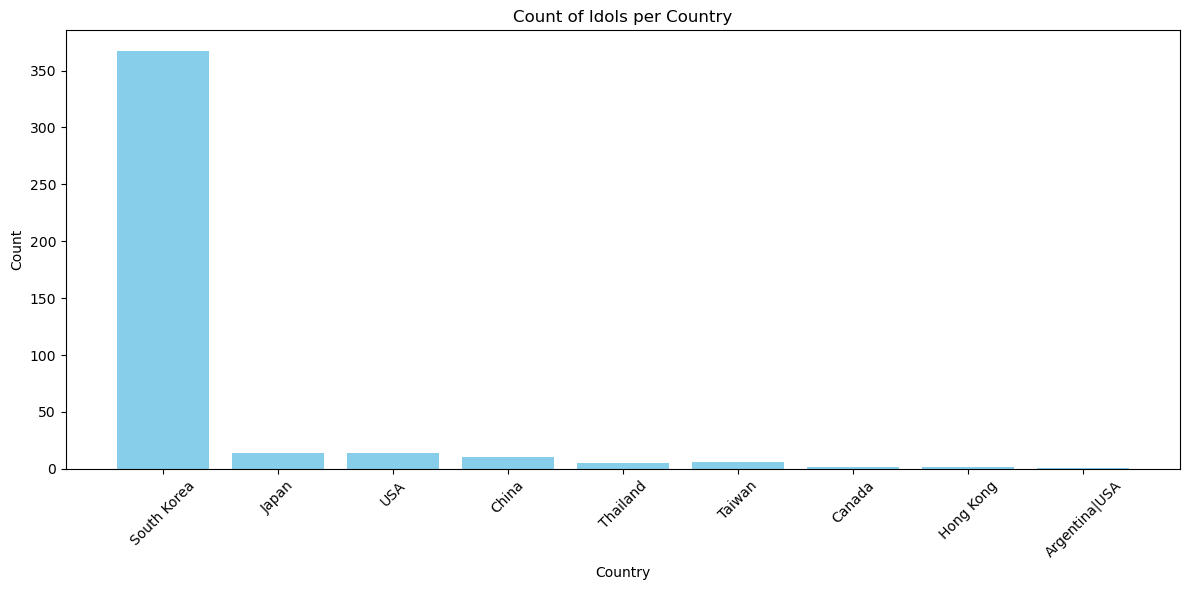

In [20]:
combined_counts = {
    'South Korea': 367,  
    'Japan': 14,
    'USA': 14,
    'China': 10,
    'Thailand': 5,
    'Taiwan': 6,
    'Canada': 2,
    'Hong Kong': 2,
    'Argentina|USA': 1
}

plt.figure(figsize=(12, 6))
plt.bar(combined_counts.keys(), combined_counts.values(), color='skyblue')
plt.title('Count of Idols per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Next up, I'm going to display the top 10 people and groups with most followers.

Top 10 individuals with the most followers:
             Full.Name  Followers
198  Pranpriya Manoban   93337766
143         Kim Jennie   78527157
154          Kim Jisoo   72397050
342       Kim Taehyung   58541265
150         Park Jimin   49385614
129        Jung Hoseok   45880758
151        Kim Seokjin   45165530
259        Kim Namjoon   43681931
77          Cha Eunwoo   36175751
131       Jackson Wang   32016901


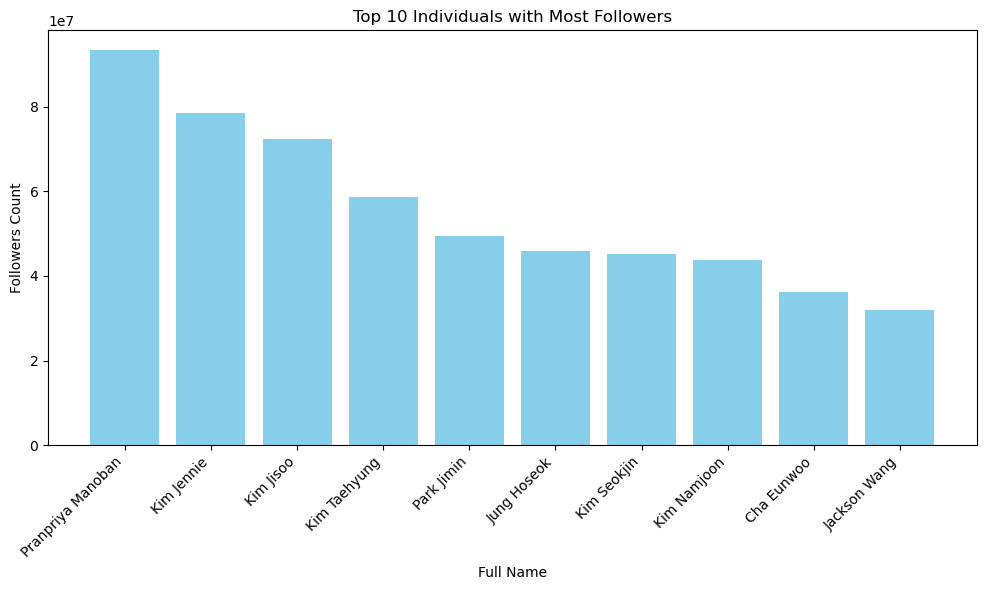

In [32]:
top_10_followers = data.nlargest(10, 'Followers')

print("Top 10 individuals with the most followers:")
print(top_10_followers[['Full.Name', 'Followers']])

plt.figure(figsize=(10, 6))
plt.bar(top_10_followers['Full.Name'], top_10_followers['Followers'], color='skyblue')
plt.title('Top 10 Individuals with Most Followers')
plt.xlabel('Full Name')
plt.ylabel('Followers Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 groups with the highest followers:
Group
BLACKPINK       244261973
BTS             242655098
EXO             117263202
NCT             114667154
GOT7             98885791
TWICE            84433506
SEVENTEEN        73608450
RED VELVET       56998187
ASTRO            46089894
SUPER JUNIOR     38286896
Name: Followers, dtype: int64


Text(0.5, 0, 'Group')

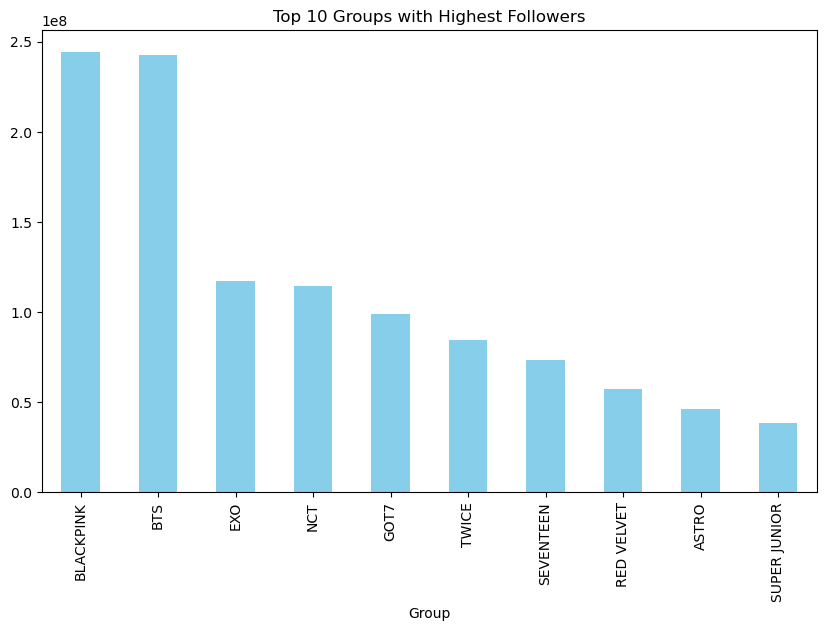

In [42]:
group_followers = data.groupby('Group')['Followers'].sum().sort_values(ascending=False)

top_10_groups = group_followers.head(10)

print("Top 10 groups with the highest followers:")
print(top_10_groups)

plt.figure(figsize=(10, 6))
top_10_groups.plot(kind='bar', color='skyblue')
plt.title('Top 10 Groups with Highest Followers')
plt.xlabel('Group')

I'm going to check if there is a correlation between experience and followers

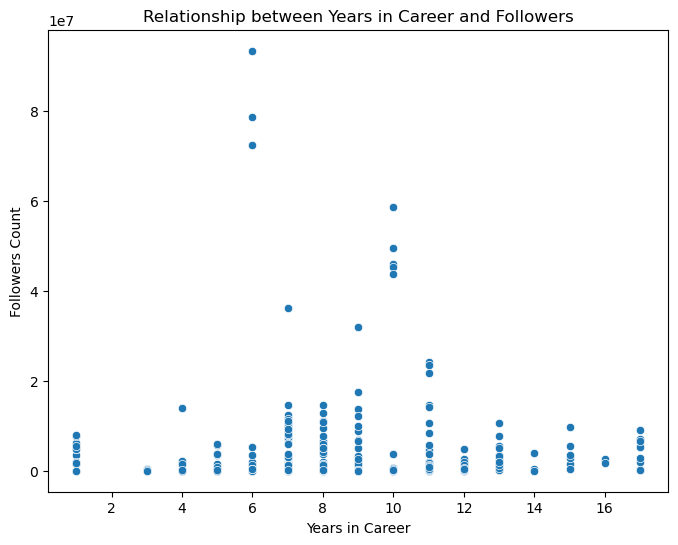

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='year.career', y='Followers')
plt.title('Relationship between Years in Career and Followers')
plt.xlabel('Years in Career')
plt.ylabel('Followers Count')
plt.show()

In [34]:
correlation = data['year.career'].corr(data['Followers'])
print(f"Correlation between year.career and Followers: {correlation}")

Correlation between year.career and Followers: 0.01566987321325652


Following, I'm going to display the distribution of followers count based on gender

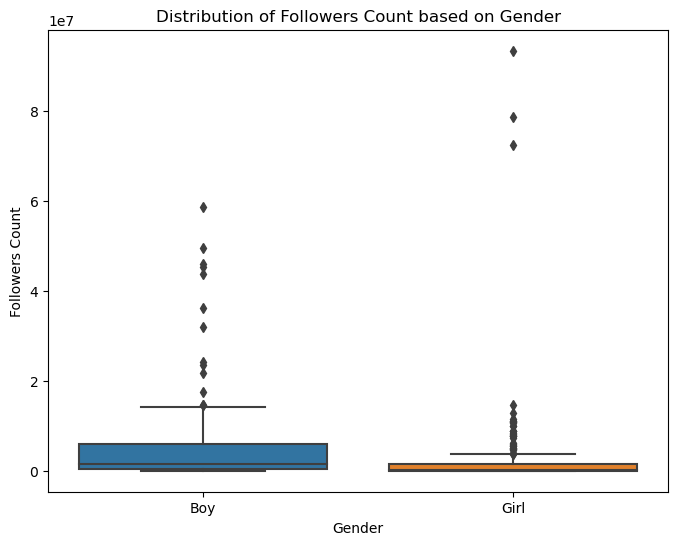

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Gender.x', y='Followers')
plt.title('Distribution of Followers Count based on Gender')
plt.xlabel('Gender')
plt.ylabel('Followers Count')
plt.show()

In [43]:
Q1 = summary_stats['25%']
Q3 = summary_stats['75%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_boy = data[(data['Gender.x'] == 'Boy') & (data['Followers'] > upper_bound['Boy'])]
outliers_girl = data[(data['Gender.x'] == 'Girl') & (data['Followers'] > upper_bound['Girl'])]

print("\nOutliers for Followers Count based on Gender (Boy):")
print(outliers_boy[['Gender.x', 'Followers']])
print("\nOutliers for Followers Count based on Gender (Girl):")
print(outliers_girl[['Gender.x', 'Followers']])


Outliers for Followers Count based on Gender (Boy):
    Gender.x  Followers
13       Boy   21803656
14       Boy   17525604
34       Boy   24056706
77       Boy   36175751
129      Boy   45880758
131      Boy   32016901
137      Boy   14585953
150      Boy   49385614
151      Boy   45165530
178      Boy   14619606
259      Boy   43681931
272      Boy   23425827
342      Boy   58541265

Outliers for Followers Count based on Gender (Girl):
    Gender.x  Followers
4       Girl    5519743
25      Girl    6162880
28      Girl    8858825
43      Girl    8081245
95      Girl    4632988
107     Girl    8829733
113     Girl    7811045
127     Girl   11113475
143     Girl   78527157
145     Girl    7215888
149     Girl    8786200
154     Girl   72397050
159     Girl    5018813
166     Girl   14543633
180     Girl    4765820
187     Girl   10563163
198     Girl   93337766
211     Girl    8317566
221     Girl    5615380
231     Girl   11504255
233     Girl    5093547
237     Girl    3933462
242  

Lastly, I'm going to show the proportion of idols by gender.

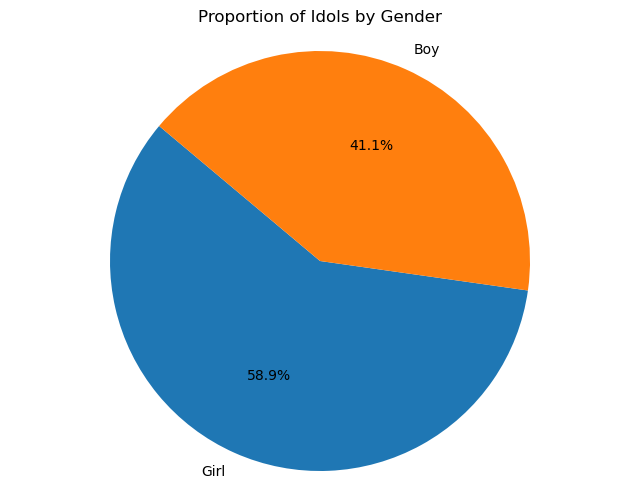

In [39]:
gender_counts = data['Gender.x'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Idols by Gender')
plt.axis('equal')  
plt.show()

MEDIUM LINK: https://medium.com/@41171128h/程式語言作業五-9bd64d559da8